# A*アルゴリズム（迷路探索）

## インストールが必要なライブラリ
Anacondaの場合は一度だけ必要となる場合がある

In [1]:
!pip install numpy

## ライブラリのインポート



In [2]:
import numpy as np
from itertools import chain

## 幅優先探索

In [3]:
connect = [[1, 5], [0, 2, 6], [1, 3, 7], [2, 4, 8], [3, 9],
        [6, 0, 10], [5, 7, 1, 11], [6, 8, 2, 12], [7, 9, 3, 13], [8, 4, 14],
        [11, 5, 15], [10, 12, 6, 16], [11, 13, 7, 17], [12, 14, 8, 18], [13, 9, 19],
        [16, 10, 20], [15, 17, 11, 21], [16, 18, 12, 22], [17, 19, 13, 23], [18, 14, 24],
        [21, 15], [20, 22, 16], [21, 23, 17], [22, 24, 18], [23, 19]]

width = 5
height = 5
goal = 23
hn = []
for i in range(max(chain(*connect))+1):
#    hn.append(np.sqrt((i//height - goal//height)**2+(i%width - goal%width)**2))#直線距離
    hn.append(np.abs(i//height - goal//height)+np.abs(i%width - goal%width))#マンハッタン距離

gn = [100]*(max(chain(*connect))+1)
gn[0] = 0

fn = [100]*(max(chain(*connect))+1)
fn[0] = hn[0]

import copy
cost  = copy.deepcopy(connect)
for i in range(len(connect)):
    for j in range(len(connect[i])):
        cost[i][j] = 1

    
prev = [-1]*(max(chain(*connect))+1)

open_list = [0]
close_list = []

while open_list:
    a = [fn[i] for i in open_list]#キューのgnをリスト化
    b = np.argsort(a)[0]#fnの最も小さい番号を取得
    now = open_list.pop(b)#[b]#そのIDを取得
    close_list.append(now)            
    for j, i in enumerate(connect[now]):
        if gn[i] > gn[now] + cost[now][j]:
            gn[i] = gn[now] + cost[now][j]
        if not(i in close_list):
            if fn[i] > gn[i] + hn[i]:
                fn[i] = gn[i] + hn[i]
                prev[i] = now
                if not(i in open_list):
                    open_list.append(i)
    if goal in open_list:
        break


print(close_list)
print(prev)

[0, 1, 5, 2, 6, 10, 3, 7, 11, 15, 8, 12, 16, 20, 13, 17, 21, 18]
[-1, 0, 1, 2, 3, 0, 1, 2, 3, 8, 5, 6, 7, 8, 13, 10, 11, 12, 13, 18, 15, 16, 17, 18, -1]


## 経路の表示

In [4]:
p = 23
route = []
route.append(p)
while p:
    p = prev[p]
    route.append(p)
    print(p)
print(route)

18
13
8
3
2
1
0
[23, 18, 13, 8, 3, 2, 1, 0]


## 以下、可視化するための処理

## 可視化するためにインストールが必要なライブラリ

In [5]:
!pip install networkx#可視化するときに必要
!pip install matplotlib#可視化するときに必要
!pip install pydot graphviz#可視化するときに必要
#!conda install python-graphviz#anacondaで実行するときに必要、cmd promptで実行する必要がある

ERROR: Invalid requirement: 'networkx#可視化するときに必要'
ERROR: Invalid requirement: 'matplotlib#可視化するときに必要'
ERROR: Invalid requirement: 'graphviz#可視化するときに必要'


## 可視化するためのライブラリのインポート

In [6]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout#表示用
import matplotlib.pyplot as plt#表示用
import matplotlib.animation as animation#アニメーション用
from IPython.display import HTML#アニメーション用

## graphvizで表示するためのデータ形式の変換

In [7]:
tree_graph = []
for i, tr in enumerate(connect):
    for j in tr:
        tree_graph.append((i,j))
print(tree_graph)

[(0, 1), (0, 5), (1, 0), (1, 2), (1, 6), (2, 1), (2, 3), (2, 7), (3, 2), (3, 4), (3, 8), (4, 3), (4, 9), (5, 6), (5, 0), (5, 10), (6, 5), (6, 7), (6, 1), (6, 11), (7, 6), (7, 8), (7, 2), (7, 12), (8, 7), (8, 9), (8, 3), (8, 13), (9, 8), (9, 4), (9, 14), (10, 11), (10, 5), (10, 15), (11, 10), (11, 12), (11, 6), (11, 16), (12, 11), (12, 13), (12, 7), (12, 17), (13, 12), (13, 14), (13, 8), (13, 18), (14, 13), (14, 9), (14, 19), (15, 16), (15, 10), (15, 20), (16, 15), (16, 17), (16, 11), (16, 21), (17, 16), (17, 18), (17, 12), (17, 22), (18, 17), (18, 19), (18, 13), (18, 23), (19, 18), (19, 14), (19, 24), (20, 21), (20, 15), (21, 20), (21, 22), (21, 16), (22, 21), (22, 23), (22, 17), (23, 22), (23, 24), (23, 18), (24, 23), (24, 19)]


## graphvizで表示

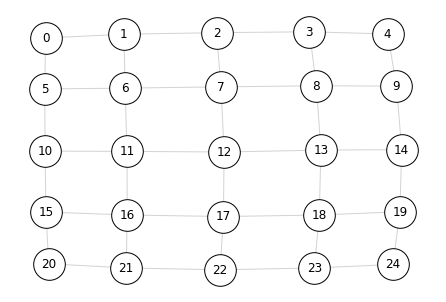

In [8]:
G = nx.Graph()  # 無向グラフ
G.add_nodes_from(range(max(chain(*connect))+1))
G.add_edges_from(tree_graph)
pos = nx.spring_layout(G, seed=22)#7,14
nx.draw(G, pos, node_color='w', edgecolors='k', edge_color='lightgrey', node_size=1000, with_labels=True)

## アニメーション表示用
ノードの色の決定

In [9]:
def MakeField(maxnode, close_list, route):
    pc = ['w']*maxnode

    for i in close_list:#探索済み（クローズドリスト）の色
        pc[i]='lightgray'#白黒表示
#        pc[i]='lightsalmon'#カラー表示
    if len(close_list)>0:#探索対象となるノードの色
        pc[close_list[-1]]='gray'#白黒表示
#        pc[close_list[-1]]='lightgreen'#カラー表示
    for i in route:#ルートの表示用
        pc[i]='dimgray'#白黒表示
#        pc[i]='cyan'#カラー表示
    return pc

## アニメーションの表示

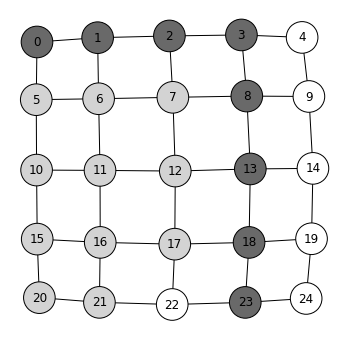

In [10]:
n = 0

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
def update(k):
    global n
    plt.cla()
    plt.axis('off')
    if n<len(close_list):
        pc = MakeField(len(list(G)), close_list[:n], [])
    else:
        pc = MakeField(len(list(G)), close_list, route[:n-len(close_list)])

    nx.draw_networkx(G, pos, node_color=pc, edgecolors='k', edge_color='k', node_size=1000, with_labels=True)
    n = n + 1
    
ani = animation.FuncAnimation(fig, update, interval = 100, frames = len(close_list)+len(route), repeat=False)
HTML(ani.to_jshtml())#jupyter notebookに表示
#ani.save("anim.gif")#gifアニメーションファイルの保存